## Interactive Programming with Widgets Worksheet 1

To get started, run the following code block to load in the jupyter widgets module:

In [2]:
import ipywidgets as widgets

### Interactive programming

* We've learned a lot about *algorithmic thinking*--how a computer processes instructions.

* We also need to learn how a computer interacts with a user--*interactive programming*.
    * so far we have `input()`:  the result is a string variable that you can use in code.
    * but you know from using the web that user input can be a lot more sophisticated.

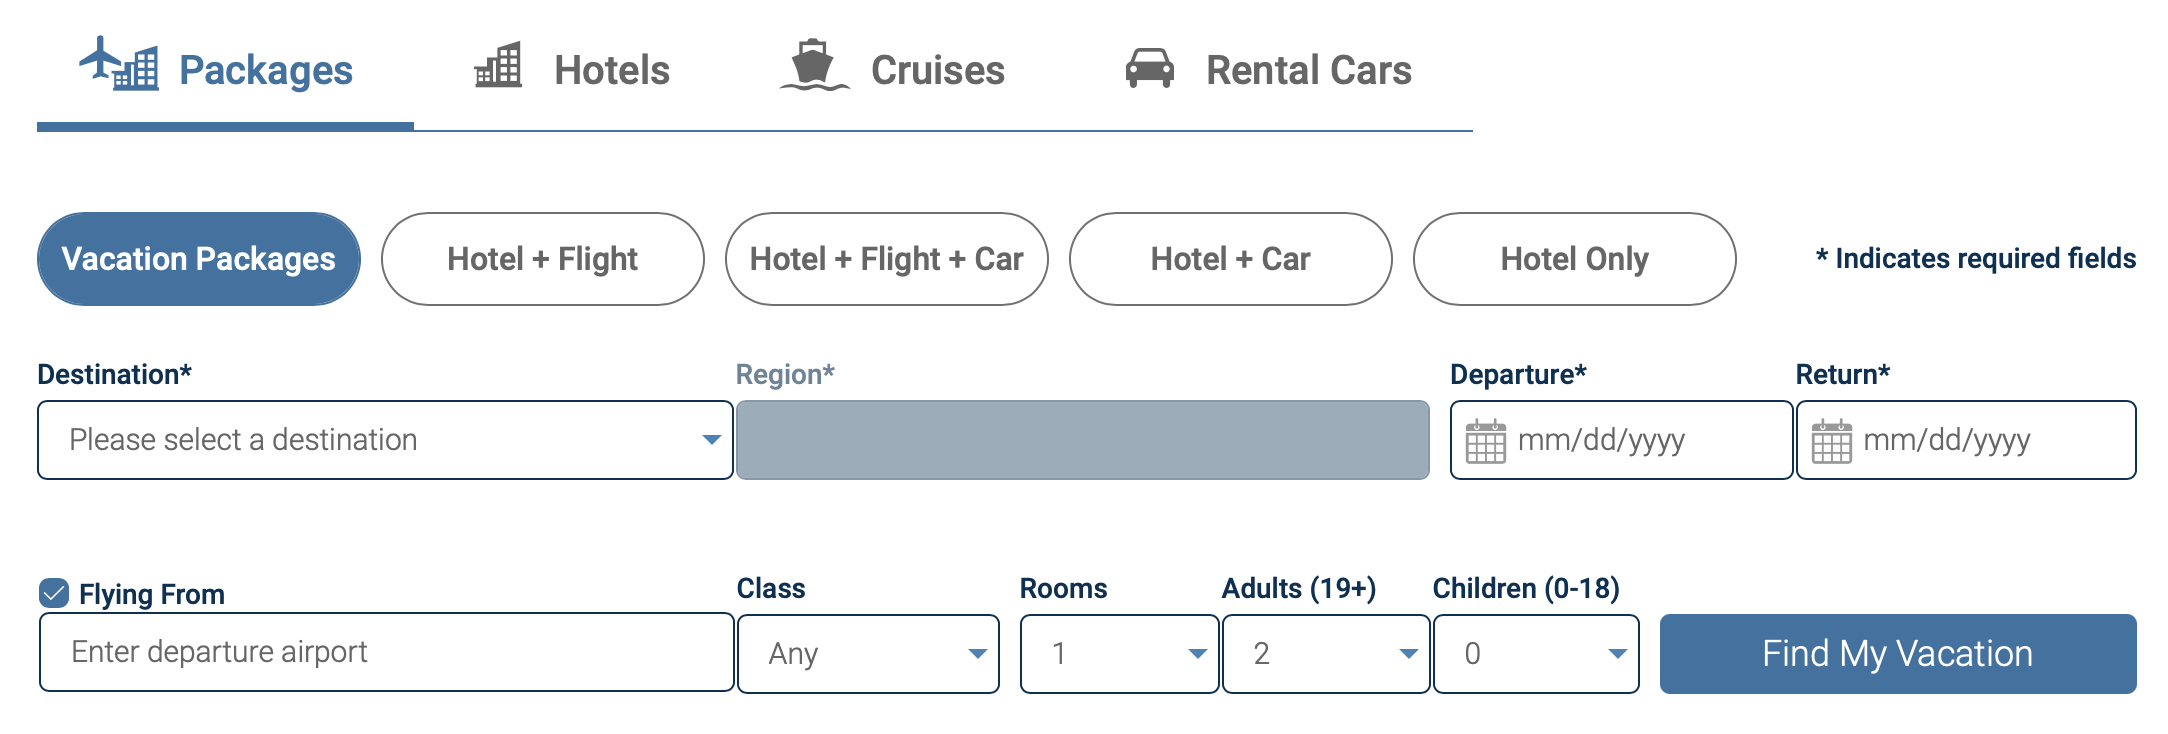

Compare the same countdown timer in the following 2 code blocks. (Since it's a timer, you may want to choose something like `0:10` so that it only counts through 10 seconds.)

As a programmer, you may prefer the fewer lines of code in Version 1. But as a ***user***, which one do you prefer?

In [21]:
## Version 1
import time
duration = input('Enter mm:ss ')
speed = float(input('Enter your timer speed (from 0.1 to 1)'))
durationList = duration.split(':')

mins = int(durationList[0] or 0)
secs = int(durationList[1] or 0)

while mins >= 0:
    while secs >= 0:
        print('\r{:02}:{:02}'.format(mins, secs), end='')
        secs = secs - 1
        time.sleep(speed)
    mins = mins - 1
    secs = 59
print("\nTime's up!")

Enter mm:ss  0:20
Enter your timer speed (from 0.1 to 1) 0.5


00:00
Time's up!


In [17]:
## Version 2
start = widgets.Text(placeholder='Enter mm:ss')
speed_label = widgets.Label(value='Use the slider to enter a timer speed (from 0.1 to 1 seconds)')
speed = widgets.FloatSlider(min=0.1, max=1)
click = widgets.Button(description='Click to start timer')
time_display = widgets.Label(value='')

out4 = widgets.Output()
out4.layout = ({"border":"4px solid purple", "width": "60%"})
with out4:
    vert1 = widgets.VBox([start, speed_label, speed, click])
    vert2 = widgets.VBox([time_display])
    display(widgets.HBox([vert1, vert2]))
    
    
def timer(start_time):
    import time
    global current_time
    durationList = str(start_time).split(':')

    mins = int(durationList[0])
    secs = int(durationList[1])
    time_display.layout = {"border": "2px solid red"}  
    
    while mins >= 0:
        while secs >= 0:
            time_display.value = (f'{mins:02}:{secs:02}')
            secs = secs - 1
            time.sleep(speed.value)
        mins = mins - 1
        secs = 59
    time_display.value = ('Time\'s up!')

def start_timer(arg):
    timer(start.value)
    
click.on_click(start_timer)
    
out4

Output(layout=Layout(border_bottom='4px solid purple', border_left='4px solid purple', border_right='4px solid…

## Widgets

From your reading:  "A Jupyter widget is a Python object that has a graphical representation."

To us, widgets provide an easy interface for a user to provide input into a program. Within Jupyter, we can use the *ipywidgets* module. Notice in the import statement at the top of this worksheet, we specified an alias...`as widgets`. Without this, everytime you run a widgets function, you'd need to type `ipywidgets.FunctionName()`...with the alias, you only need to type `widgets.FunctionName()`. For example, `widgets.Button()`. (You can even shorten the alias further to type less...for example `import ipywidgets as w` would allow you to type `w.Button()` to create a button widget.)

### Part 1 - Drawing a Widget

Since we've been talking about creating a button, let's actually create one. Run the next code block and see if you can make sense of how the function works:

In [4]:
widgets.Button(description='Click me')

Button(description='Click me', style=ButtonStyle())

Notice you can click the button although nothing happens yet...that's coming soon.

There are other arguments you can use to customize your button. Try running the next code block to see what happens:

In [5]:
widgets.Button(description='This is a test', button_style = 'success', icon = 'check')

Button(button_style='success', description='This is a test', icon='check', style=ButtonStyle())

How do you know what the options are? You read the documentation here: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Button

Here's a snippet:

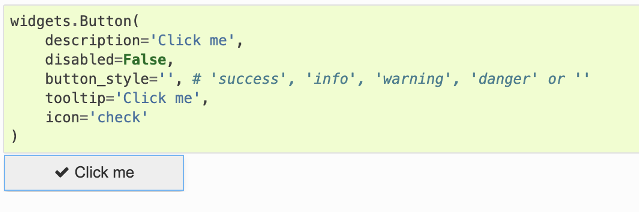

At the link above, look up the documentation for a integer slider (IntSlider) and create a vertical IntSlider widget below that ranges from 50-75, has a label stating, 'Choose a number:', and a default starting value of 65. (Hint: the integer slider is a "numeric widget".)

In [27]:
widgets.IntSlider(min=50, max=75, value=65, orientation = 'vertical', description = 'Choose a number:', layout = {"width": "max-content"})

IntSlider(value=65, description='Choose a number:', layout=Layout(width='max-content'), max=75, min=50, orient…

Now create the following radio buttons (which are a selection widget):

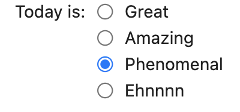

In [30]:
widgets.RadioButtons(
    options = ['Great', 'Amazing', 'Phenomenal', 'Ehnnnn'], value = 'Phenomenal', description = "Today is:")

RadioButtons(description='Today is:', index=2, options=('Great', 'Amazing', 'Phenomenal', 'Ehnnnn'), value='Ph…

### Part 2 - The Output() Widget

Up until now, all of our widgets have appeared directly below the code block. What if we had multiple widgets in the same code block? Run the code below to see what happens:

In [31]:
widgets.Button(description='click here for $1 million!!!')
widgets.Select(options=['$0.25', '$0.50', '$0.75', '$1.00'], value = '$0.50', 
               description = 'Bank Amt:')

Select(description='Bank Amt:', index=1, options=('$0.25', '$0.50', '$0.75', '$1.00'), value='$0.50')

You'll never be able to click for a million dollars because Jupyter only displays the last line of code in the code block.

The Output widget creates a type of Jupyter canvas on which you can draw multiple widgets. Run the code below to see how it works:

In [3]:
testButton = widgets.Button(description='No more millions :/', button_style = 'danger')
testSelect = widgets.Select(options=['Strawberries', 'Blueberries', 'Mangoes', 'Is that how you spell "Mangoes"?'])

out = widgets.Output()
with out:
    display(testButton)
    display(testSelect)
    
out

Output()

Notice the following:
 * You can assign a widget to a variable using an assignment statement
 * Output() takes no arguments. However...
 * ... to draw something on the Output() widget, you need to use a `with` statement and `display()` the widgets
 
Look at what happens when you add a widget after the Output() canvas has been drawn. Run the next code block and notice that there is no code in the following block to print out the Output canvas:

In [35]:
secondButton = widgets.Button(description='Eat more fruits!', button_style = 'success', icon = 'check')
with out:
    display(secondButton)

As you display widgets, they just keep adding to the canvas. What if you'd like to clear the canvas? Run the next code block to see:

In [42]:
out.clear_output()

It cleared the Output canvas that you drew up above.

Now that we're back to a blank canvas, go ahead and add to the `out` canvas the integer slider and radio buttons you created up above. You'll need to assign those widgets to variables so that you can display them.

In [1]:
#Write your code here
slider = widgets.IntSlider(min=50, max=75, value=65, orientation = 'vertical', description = 'Choose a number:', layout = {"width": "max-content"})
radio_buttons = widgets.RadioButtons(options = ['Great', 'Amazing', 'Phenomenal', 'Ehnnnn'], value = 'Phenomenal', description = "Today is:")
with out:
    display(slider)
    display(radio_buttons)
    
out

NameError: name 'widgets' is not defined

Notice that the widgets are currently being displayed vertically, one on top of the other. There's a display widget called `HBox()` that will display widgets horizontally in a box.

See how this works below:

In [44]:
#First I'm going to draw some widgets:
widget1 = widgets.DatePicker(description='Birthdate:')
widget2 = widgets.Dropdown(options=['Tesla Model S', 'MINI Cooper GP', 'Jaguar XJ', 'Honda Accord'],
                           description='Gift Ideas:')

#This next line puts them in a horizontal box:
horizontal_box = widgets.HBox([widget1, widget2])

#Now, I'm creating a new Output canvas called 'birthday_output' where I'm displaying the box
birthday_output = widgets.Output()
with birthday_output:
    display(horizontal_box)
    
birthday_output

Output()

In addition to `HBox`, there's also `VBox` for vertical boxes and, as the reading for today shows, you can combine both `HBox` and `VBox` to create a grid.

### Practice

Okay, now it's your turn to put all of this together. Create a new Output canvas called `out2` that displays the following widgets in the layout displayed:

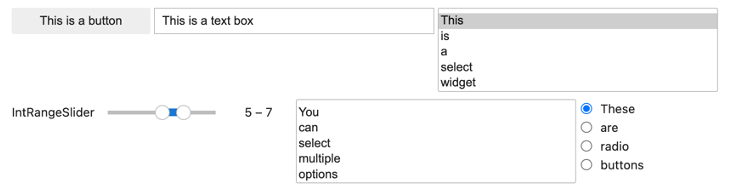

*Note: the Integer Range Slider has a range from 0 to 10.*

In [78]:
out2 = widgets.Output()

button = widgets.Button(description = 'This is a button', button_style = 'info')
text = widgets.Text(placeholder = 'This is a text box')
select = widgets.Select(options=['This', 'is', 'a', 'select', 'widget'], value = 'This') 
slider = widgets.SelectionRangeSlider(description = 'IntRangeSlider', options = options, index(0,10))
select_mult
radio_buttons

line1 = widgets.HBox(button, text, select)
line2 = widgets.HBox(slider, select_mult, radio_buttons)


with out2:
    display(line1)
    display(line2)

out2

SyntaxError: positional argument follows keyword argument (414517868.py, line 7)